## Martin Dionne

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import classification_report

# 1. Binary Classification

### 1.1 Titanic, but correctly this time

Take your linear regression model from the workshop 3.3 on the titanic dataset.

Swap OLS for logistic regresssion and compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).

How much better is logistic regression than OLS on binary data?

In [3]:
df = sns.load_dataset('titanic')
# remove redundant features and deck (too much missing data)
df = df.drop(columns=['class', 'embark_town', 'alive', 'deck'])

# remove parch and embarked (p value > 0.05)
#df = df.drop(columns=['parch', 'embarked'])

#df.age = df.age.fillna(df.age.mean())
df.sex = df.sex.replace('male', 1).replace('female', 0)
df.alone = df.alone.replace(True, 1).replace(False, 0)
df.adult_male = df.adult_male.replace(True, 1).replace(False, 0)
df.who = df.who.replace(('child', 'woman', 'man'), (0,1,2))
#df.embarked = df.embarked.replace(('C', 'S', 'Q'), (0,1,2))
df = df.join(pd.get_dummies(df['embarked'], drop_first=True, prefix='embarked')).drop(columns=['embarked'])

#df['age_2'] = df.age ** 2
#df['age_3'] = df.age ** 3
#df['fare'] = np.log(df.fare + 1)
df = df.dropna()
df


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,2,1,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,1,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,0,0,1,0
886,0,2,1,27.0,0,0,13.0000,2,1,1,0,1
887,1,1,0,19.0,0,0,30.0000,1,0,1,0,1
889,1,1,1,26.0,0,0,30.0000,2,1,1,0,0


In [4]:
#y = df.survived
#X = df.drop(columns='survived')
##est = sm.Logit(y, X).fit(cov_type='HC2')
##y_pred_lin = est.predict(X_test)
#est = sm.OLS(y,sm.add_constant(X)).fit(cov_type='HC2')
#y_pred_lin = est.predict(sm.add_constant(X_test))
#est.summary()

In [5]:
y = df.survived
X = df.drop(columns='survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
#convert results to binary predictions
f = lambda x: 1 if x > 0.5 else 0
vect_f = np.vectorize(f)
print(metrics.classification_report(y_test, vect_f(y_pred_lin)))

log_reg = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print(metrics.classification_report(y_test, y_pred_log))

# result are only slighly better

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       125
           1       0.79      0.72      0.76        90

    accuracy                           0.80       215
   macro avg       0.80      0.79      0.80       215
weighted avg       0.80      0.80      0.80       215

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       125
           1       0.80      0.73      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



# 2. Intro To Computer Vision

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic in computer vision. It's a database of manually written digits (from 0 to 9) scanned into a 28x28 pixel image.

The `X` matrix is 784 numbers (28x28) with numbers saying how dark the pixel is. The `y` variable is the number. The task is to use the images to do optical recognition.

You can fetch the dataset with the following command:

```
from sklearn.datasets import fetch_openml
fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
```

Use sklearn's logistic regression and any of the tricks you want to boost predictive accuracy. Here's a few notes:

- Use the sklearn `train_test_split` we saw in class to keep some holdout data to test on.

- You can use whatever sklearn preprocessing you think is relevant. Here's a few: 
```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
```

- Since there's many features (especially if you use data augmentation like polynomial features), this is a good time to use regularization. Try to find the best regularization parameters possible.

- You should be able to get at least 80% on a test set size of 10_000

In [6]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
from sklearn.datasets import fetch_openml
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

In [7]:
X = mnist['data']
y = mnist['target']
test_sample = 10000
train_samples = len(y) - test_sample

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=test_sample)
logreg = LogisticRegression(max_iter=500, solver='saga', tol=0.1).fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.93
[[ 964    0    2    0    2    6   10    0    8    0]
 [   0 1122    5    5    1    0    0    4   11    0]
 [   5    4  893   12   13    2   11    9   39    5]
 [   3    2   21  878    2   36    2    9   21    7]
 [   0    3    5    2  966    1   10    4    7   23]
 [   9    9    3   29    2  754   16    6   27    9]
 [   4    3    7    0    9    9  923    0    3    0]
 [   3    7    9    5   12    2    1 1003    1   28]
 [   3   17    9   25    4   29    3    5  870   13]
 [   6    2    2    7   31    7    0   33    9  897]]


In [9]:
#self.classifier = KNeighborsClassifier(n_neighbors=k)

# 3. Counting Poissons

The `data/fish.csv` is a data set of camping trips taken by 250 groups of people.

- The campers may or may not have done some fishing during their trip.
- If a group did some fishing, they would have caught zero or mor fish.
- We want to estimate not only how many fish were caught (if there was fishing done by a camping group), but also the probability that the camping group caught any fish at all.

Here's info on the columns:

**FISH_COUNT:** The number of fish that were caught. This will be our dependent variable y.

**LIVE_BAIT:** A binary variable indicating whether live bait was used.

**CAMPER:** Whether the fishing group used a camper van.

**PERSONS:** Total number of people in the fishing group. Note that in some groups, none of them may have fished.

**CHILDREN:** The number of children in the camping group.

Your task is to predict the number of fish caught (FISH_COUNT) by a camping group based on the values of LIVE_BAIT, CAMPER, PERSONS and CHILDREN variables.

Use what we learned on count variables and zero-inflated datasets to achieve the best model you can.

Interpret the models you used to give an analysis of each feature's effect on the predicted fish caught.

**N.B.** Please appreciate the effort I went through to find a fish dataset for a count problem pun.

In [10]:
df = pd.read_csv('data/fish.csv')
df.describe()

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN,FISH_COUNT
count,250.000000,250.000000,250.00000,250.000000,250.000000
mean,0.864000,0.588000,2.52800,0.684000,3.296000
std,0.343476,0.493182,1.11273,0.850315,11.635028
min,0.000000,0.000000,1.00000,0.000000,0.000000
25%,1.000000,0.000000,2.00000,0.000000,0.000000
50%,1.000000,1.000000,2.00000,0.000000,0.000000
75%,1.000000,1.000000,4.00000,1.000000,2.000000
max,1.000000,1.000000,4.00000,3.000000,149.000000


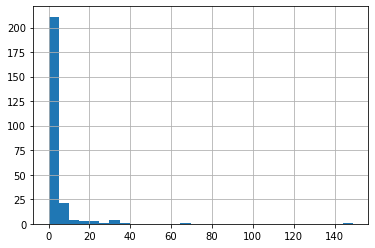

In [11]:
df.FISH_COUNT.hist(bins=30)

In [12]:
y = df['FISH_COUNT']
X = df.drop(columns=['FISH_COUNT'])
#est = sm.ZeroInflatedPoisson(y, sm.add_constant(X)).fit()
est = sm.Poisson(y, sm.add_constant(X)).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 3.167911
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             FISH_COUNT   No. Observations:                  250
Model:                        Poisson   Df Residuals:                      245
Method:                           MLE   Df Model:                            4
Date:                Mon, 01 Feb 2021   Pseudo R-squ.:                  0.5193
Time:                        21:44:52   Log-Likelihood:                -791.98
converged:                       True   LL-Null:                       -1647.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3901      0.265    -12.797      0.000      -3.909      -2.871
LIVE_BAIT      1.6697      0.233      7.160      0.000       1.213       2.127
CAMPER         0.8001      0.089      8.943      0.000       0.625       0.975
PERSONS        1.0740      0.039     27.534      0.000       0.998       1.150
CHILDREN      -1.7099      0.081    -21.005      0.000      -1.869      -1.550
==============================================================================
"""

# 5. Survival Question

The `data/telco_churn.csv` dataset comes from [here](https://www.kaggle.com/blastchar/telco-customer-churn) and here is the description:

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


**5.1 StreamingTV churn**

The `Tenure` column is how long the customer lasted. Make the survival curve for both the group using StreamingTV and the one not using it in the dataset

![](streamingtv.png)


**5.2 Survival Regression**

Use either lifelines or statsmodels to implement a survival regression model predicting tenure. Don't forget to use the churn column as the event column.

In [13]:
df = pd.read_csv('data/telco_churn.csv', na_values=' ')

# binary features
yes_no = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn' ]
df[yes_no] = df[yes_no].replace(('No internet service', 'No', 'Yes'), (np.nan,0,1))
df['gender'] = df['gender'].replace(('Female', 'Male'), (0,1))

# ordinal features
#df['MultipleLines'] = pd.Categorical(df['MultipleLines'], ordered=True, categories=['No phone service', 'No', 'Yes']).codes
df['MultipleLines'] = df['MultipleLines'].replace(('No phone service', 'No', 'Yes'), (0,1,2))
df['InternetService'] = df['InternetService'].replace(('No', 'DSL', 'Fiber optic'), (0,1,2))
df['Contract'] = df['Contract'].replace(('Month-to-month', 'One year', 'Two year'), (0,1,2))
df['PaymentMethod'] = df['PaymentMethod'].replace(('Mailed check', 'Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)'), (0,1,2,3))

# drop columns with unique rows
df = df.drop(columns=['customerID'])

#df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])
#df[yes_no] = df[yes_no].fillna(0)
df = df.dropna()
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1.0,0.0,1.0,1.0,0.0,0.0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,1.0,0.0,1.0,1.0,1.0,1.0,1,1,0,84.80,1990.50,0
7039,0,0,1,1,72,1,2,2,0.0,1.0,1.0,0.0,1.0,1.0,1,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,74.40,306.60,1


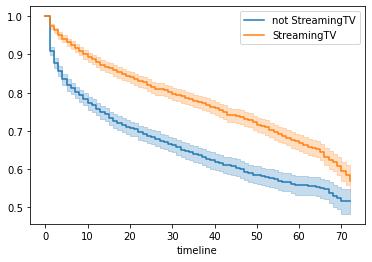

In [14]:
# 5.1 StreamingTV churn
#sm.SurvfuncRight(y, status=censor).plot()

from lifelines import KaplanMeierFitter

sub = df[['tenure', 'Churn', 'StreamingTV']]

kmf = KaplanMeierFitter()
kmf.fit(sub.tenure, sub.Churn)
#kmf.plot_survival_function()

groups = df['StreamingTV']
ix = (groups == 1)
kmf.fit(sub.tenure[~ix], sub.Churn[~ix], label='not StreamingTV')
ax = kmf.plot_survival_function()
kmf.fit(sub.tenure[ix], df.Churn[ix], label='StreamingTV')
ax = kmf.plot_survival_function(ax=ax)

In [15]:
# 5.2 Survival Regression
y = df['tenure']
X = df.drop(columns=['tenure'])

est = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tenure   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     4503.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:44:55   Log-Likelihood:                -17851.
No. Observations:                5512   AIC:                         3.574e+04
Df Residuals:                    5492   BIC:                         3.587e+04
Df Model:                          19                                         
Covariance Type:                  HC2                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               25.0605      0.600     41.749      0.000      23.884      26.237
gender               0.1298      0.167      0.777      0.437      -0.198       0.457
SeniorCitizen        0.6251      0.210      2.982      0.003       0.214       1.036
Partner              1.2723      0.192      6.628      0.000       0.896       1.649
Dependents          -0.0654      0.221     -0.296      0.767      -0.498       0.368
PhoneService        -0.8977      1.181     -0.760      0.447      -3.213       1.418
MultipleLines        0.6282      0.381      1.648      0.099      -0.119       1.375
InternetService      1.0348      1.771      0.584      0.559      -2.436       4.505
OnlineSecurity       1.1008      0.406      2.715      0.007       0.306       1.896
OnlineBackup         1.0005      0.390      2.568      0.010       0.237       1.764
DeviceProtection     0.8395      0.395      2.124      0.034       0.065       1.614
TechSupport          0.1816      0.405      0.448      0.654      -0.613       0.976
StreamingTV          0.7792      0.726      1.073      0.283      -0.644       2.202
StreamingMovies      0.7004      0.724      0.967      0.334      -0.719       2.120
Contract             1.7668      0.171     10.316      0.000       1.431       2.102
PaperlessBilling     0.2081      0.195      1.068      0.285      -0.174       0.590
PaymentMethod        0.8459      0.093      9.111      0.000       0.664       1.028
MonthlyCharges      -0.3600      0.071     -5.083      0.000      -0.499      -0.221
TotalCharges         0.0106   6.75e-05    157.027      0.000       0.010       0.011
Churn               -1.0402      0.188     -5.525      0.000      -1.409      -0.671
==============================================================================
Omnibus:                       86.217   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.246
Skew:                          -0.076   Prob(JB):                     4.34e-35
Kurtosis:                       3.816   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""